<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ARIMA Lab

_Authors: Joseph Nelson (DC)_

---

## Introduction

> ***Note:*** _This can be a pair programming activity or done independently._

The most common application for AR, ARMA, and ARIMA models is inventory planning. Planning inventory for a small shop can be difficult enough, but you've just been hired to plan inventory for a _big_ store - Walmart

In this lab, you will be analyzing weekly Walmart sales data over a two year period from 2010 to 2012. The data is separated by store and by department, but you should focus on analyzing one store for simplicity. Your supervisor has set out the following goals for this project:

1. Record any observed trends in the data.
1. Produce a trained model to predict future sales numbers.
1. Include useful AND COMMENT ON how graphs (ACF, PACF) impact your modelling decisions throughout your notebook.

Try your best to tune your model. It can be difficult, but don't worry - timeseries analysis is just a difficult and specialized topic.

## Exercise
---

#### Requirements

- Assemble observations and graphs as well as timeseries models in a notebook.


#### Starter code

To setup the data:

```python
import pandas as pd
import numpy as np

%matplotlib inline

data = pd.read_csv('./datasets/train.csv')
data.set_index('Date', inplace=True)
data.head()
```

#### Steps

1. Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.
- Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?
- Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and create an autocorrelation and partial autocorrelation plot.
- *BONUS:* What do the acf() and pacf() plots say about the type of model you want to build?
- Split the weekly sales data in a training and test set - using the first 75% of the data for training.
- "Difference" the data by converting the sales into change in sales (diff function is convenient for doing this.)
- Create an AR(1) model on the training data and compute the mean absolute error of the predictions. How effective is this model?
- Plot the residuals - where are their significant errors?
- Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set?
- Assemble your findings, including any useful graphs.

#### Additional Resources

1. [ARMA Example](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma.html)
2. [ARMA Models for TSA](https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-1)


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./datasets/train.csv')
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [31]:
data = data.loc[data['Store'] == 1]

In [32]:
data = data.reset_index().groupby(['Date', 'Store'], as_index=False)[['Weekly_Sales', 'IsHoliday']].mean()

In [33]:
data.set_index('Date', inplace=True)

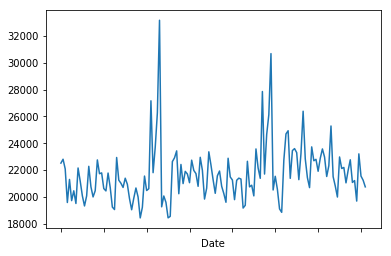

In [34]:
data.Weekly_Sales.plot()

In [37]:
#You peak before thanksgiving & christmas each year
data.sort_values('Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales,IsHoliday
Date,,,
2010-12-24,1,33165.975000,False
2011-12-23,1,30678.229595,False
2011-11-25,1,27853.707671,True
2010-11-26,1,27161.445972,True
2012-04-06,1,26384.401111,False


In [35]:
#Day before Christmas
data.loc[data['Weekly_Sales'] == 33165.975]

,Store,Weekly_Sales,IsHoliday
Date,,,
2010-12-24,1,33165.975,False


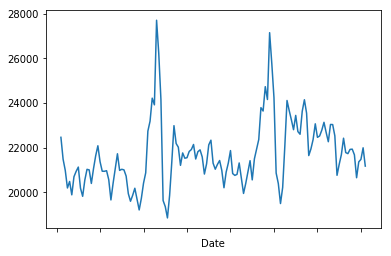

In [22]:
data.rolling(3).mean().Weekly_Sales.plot()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [43]:
data.drop(['Store', 'IsHoliday'], axis=1, inplace=True)

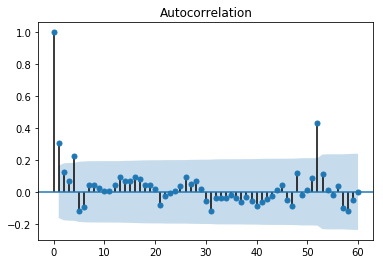

In [47]:
#there is significant correlation at 1 week, 5 weeks (weaker), and 52 weeks
plot_acf(data, lags=60);

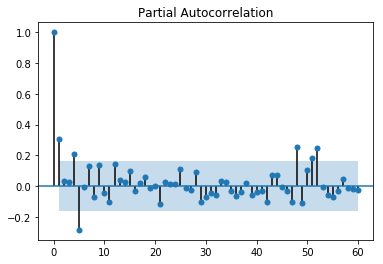

In [48]:
#similar with more correlation a month out, and several times around the 1 year mark
plot_pacf(data, lags=60);

In [50]:
#Strongest correlation is 1 year
print('1 week:  ' ,data.Weekly_Sales.autocorr(lag=1))
print('2 week:  ' ,data.Weekly_Sales.autocorr(lag=2))
print('52 week:  ' ,data.Weekly_Sales.autocorr(lag=52))

1 week:   0.303622613872712
2 week:   0.12431486171954592
52 week:   0.8737671413871526


In [57]:
#splitting
train = data[:108]
test = data[108:]

In [59]:
train_diff = train.diff()
test_diff = test.diff()

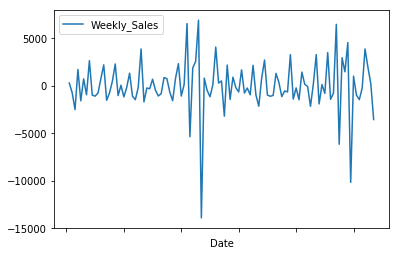

In [60]:
#more or less constant with some sizable spikes
train_diff.plot()

In [62]:
from statsmodels.tsa.arima_model import ARMA


ar1 = ARMA(train_diff.values[1:], (1, 0)).fit()

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [63]:
ar1.summary()

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood                -988.343
Method:                       css-mle   S.D. of innovations           2482.935
Date:                Tue, 03 Apr 2018   AIC                           1982.686
Time:                        11:16:38   BIC                           1990.704
Sample:                             0   HQIC                          1985.936
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0563    174.816     -0.012      0.991    -344.689     340.577
ar.L1.y       -0.3766      0.090     -4.198      0.000      -0.552      -0.201
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.6551           +0.0000j            2.6551            0.5000
-----------------------------------------------------------------------------
"""

In [66]:
test.shape

(35, 1)

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


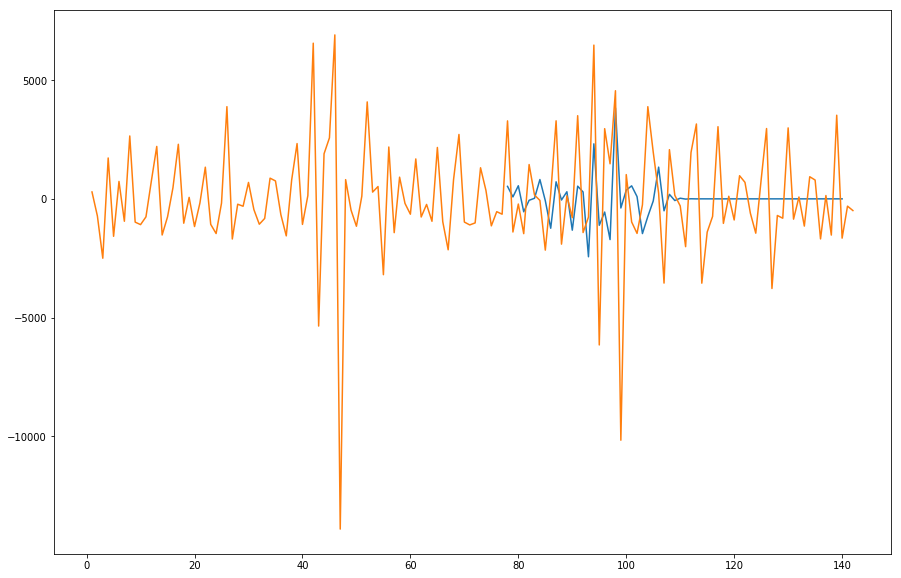

In [97]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(np.arange(78, 141),ar1.predict(start=79, end=141))
plt.plot(np.arange(143), data.diff().values)

In [93]:
test.shape

(35, 1)

In [96]:
len(ar1.predict(108,141))

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


35

In [127]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test.diff().values[1:], ar1.predict(108,140))

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1423.2528050002977

In [128]:
residuals = test.diff().values[1:] - ar1.predict(108,140)

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


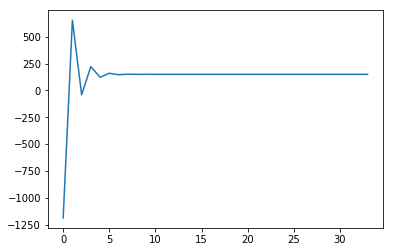

In [131]:
#Big errors across the board
plt.plot(np.arange(34), residuals[0]);

In [134]:
data_2 = data.diff(2)

In [135]:
train = data[:108]
test = data[108:]

In [136]:
ar2 = ARMA(data_2.values[1:], (2, 2)).fit()

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


LinAlgError: SVD did not converge